# Load data and EDA

### load data, check data shape, varialbe type, min/max, outlier, NAN, imbalanced classes?

In [1]:
import pandas as pd

In [2]:
# Load in training data, don't touch test data unitl get a model. 
# Assume test data are similar to training but consider possible problems like mismatch between test and training data
train=pd.read_csv('sampled_training')

In [3]:
#check head and tail of data to see data quality and consistency
train.head().T

,0,1,2,3,4
id,10002028568167339219,10006958186789044052,10011650513707909570,10022961149355219548,10029289556764215760
click,0,1,0,0,0
hour,14102100,14102100,14102100,14102100,14102100
C1,1005,1005,1005,1005,1005
banner_pos,0,0,0,0,0
site_id,9e8cf15d,85f751fd,85f751fd,85f751fd,1fbe01fe
site_domain,0d3cb7be,c4e18dd6,c4e18dd6,c4e18dd6,f3845767
site_category,f028772b,50e219e0,50e219e0,50e219e0,28905ebd
app_id,ecad2386,0acbeaa3,febd1138,e2fcccd2,ecad2386
app_domain,7801e8d9,45a51db4,82e27996,5c5a694b,7801e8d9


In [4]:
train.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
843497,6328864560178108576,1,14103000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
843498,6336251737487423545,0,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23722,320,50,2716,3,47,-1,23
843499,6339892952679179161,0,14103000,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17264,320,50,1872,3,39,-1,23
843500,6340707349159620203,0,14103000,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,23722,320,50,2716,3,47,-1,23
843501,6351645887328242777,0,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23725,320,50,2716,3,47,-1,23


In [5]:
# check data type, shape. Do the variable types(object, numerical) make sense? looks ok for now.
# Seems only categorical variables, no numeric variables
# may feature engineering for hour feature to get day of week and hour later
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843502 entries, 0 to 843501
Data columns (total 24 columns):
id                  843502 non-null uint64
click               843502 non-null int64
hour                843502 non-null int64
C1                  843502 non-null int64
banner_pos          843502 non-null int64
site_id             843502 non-null object
site_domain         843502 non-null object
site_category       843502 non-null object
app_id              843502 non-null object
app_domain          843502 non-null object
app_category        843502 non-null object
device_id           843502 non-null object
device_ip           843502 non-null object
device_model        843502 non-null object
device_type         843502 non-null int64
device_conn_type    843502 non-null int64
C14                 843502 non-null int64
C15                 843502 non-null int64
C16                 843502 non-null int64
C17                 843502 non-null int64
C18                 843502 non-null int

In [6]:
train.shape

(843502, 24)

In [7]:
# check min/max/mean. this is good to check numeric variables. 
# It's not very helpful here since all the features are categorical. Seems no outlier, but C20 has value of -1
train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.435020e+05,843502.000000,8.435020e+05,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000
mean,9.231625e+18,0.170271,1.410250e+07,1004.959553,0.293501,1.016934,0.330417,18560.262501,318.861537,60.286297,2077.663483,1.443956,217.741979,54155.776171,79.551913
std,5.325619e+18,0.375871,2.684486e+02,1.132949,0.515961,0.553377,0.854515,5007.778987,21.730624,47.965820,610.749820,1.323114,342.722108,49887.241496,66.999613
min,1.308118e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.622961e+18,0.000000,1.410222e+07,1005.000000,0.000000,1.000000,0.000000,16688.000000,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.238306e+18,0.000000,1.410251e+07,1005.000000,0.000000,1.000000,0.000000,20108.000000,320.000000,50.000000,2295.000000,2.000000,39.000000,100057.000000,52.000000
75%,1.384568e+19,0.000000,1.410272e+07,1005.000000,1.000000,1.000000,0.000000,21768.000000,320.000000,50.000000,2506.000000,3.000000,167.000000,100084.000000,91.000000
max,1.844669e+19,1.000000,1.410300e+07,1012.000000,7.000000,5.000000,5.000000,23836.000000,1024.000000,1024.000000,2729.000000,3.000000,1839.000000,100248.000000,253.000000


In [8]:
#click(1) or not click(0), imbalanced classes. the ratio is not very bad. 
#Would like to see model performance first, if not good, may cosider SMOTE or other technique to deal with imbalanced class
train.click.value_counts()

0    699878
1    143624
Name: click, dtype: int64

In [9]:
#overall click through rate
train.click.mean()

0.17027108412309633

In [10]:
#check -1 for C20
train.C20.value_counts()

-1         387195
 100084     56240
 100111     40319
 100148     40141
 100077     36115
 100075     34585
 100081     32910
 100083     17845
 100193     16539
 100074     13848
 100176     11810
 100079     11567
 100076      9987
 100189      8123
 100192      6035
 100156      5675
 100031      5635
 100190      5266
 100191      4423
 100013      4222
 100188      4143
 100119      3741
 100221      3518
 100181      3407
 100155      3284
 100194      3275
 100003      3263
 100105      2799
 100000      2596
 100182      2261
            ...  
 100179        57
 100206        54
 100091        54
 100029        51
 100135        46
 100139        40
 100056        40
 100073        39
 100121        35
 100152        31
 100175        29
 100163        29
 100109        26
 100090        26
 100099        26
 100244        25
 100165        24
 100082        19
 100137        18
 100024        18
 100224        17
 100010        13
 100138         6
 100108         6
 100122   

In [11]:
#check whether -1 for C20 gives quite different click through rate, seems ok, 0.19 vs. 0.17(overall)
train[train['C20']==-1].click.mean()

0.19135061144901147

In [12]:
# any Nan?
train.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

### Check click rate for each unique value of categary feature

In [13]:
# number of unique values for each feature
train.nunique()

id                  843502
click                    2
hour                   217
C1                       7
banner_pos               7
site_id               2366
site_domain           2506
site_category           21
app_id                2211
app_domain             156
app_category            28
device_id            78975
device_ip           153806
device_model          4415
device_type              4
device_conn_type         4
C14                   2019
C15                      8
C16                      9
C17                    390
C18                      4
C19                     64
C20                    158
C21                     55
dtype: int64

In [14]:
import numpy as np
def plot_cat_rate(df,col):
    agg = df.groupby(col)['click'].mean()
    agg_sum=df.groupby(col)['click'].count()
    err=1.95*np.sqrt(agg*(1-agg)/agg_sum)
    agg.plot(kind='bar',yerr=err).set_ylabel('click rate')
    print(col)
    print(train[col].value_counts())

#### only check features with number of unique values fewer than 10

device_type
1    771785
0     50958
4     17794
5      2965
Name: device_type, dtype: int64


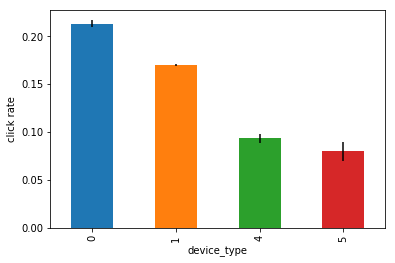

In [16]:
# device_type=4 or 5, click rate is low, also few people use them. May not launch ads on these devices
# or have to try other methods
plot_cat_rate(train,'device_type')

device_conn_type
0    728199
2     69300
3     44954
5      1049
Name: device_conn_type, dtype: int64


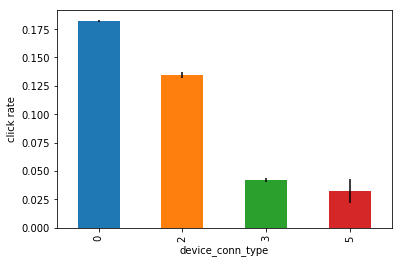

In [16]:
# device_conn_type=3 or 5, click rate is low. May not launch ads for them.
plot_cat_rate(train,'device_conn_type')

C1
1005    768532
1002     50958
1010     20759
1012      1986
1007       830
1001       273
1008       164
Name: C1, dtype: int64


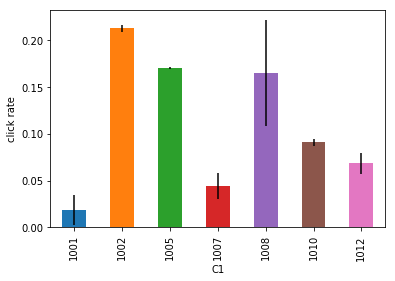

In [17]:
plot_cat_rate(train,'C1')

C15
320     787585
300      47260
216       6832
728       1604
120         95
1024        60
480         41
768         25
Name: C15, dtype: int64


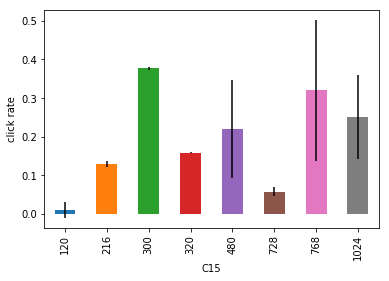

In [18]:
# C15=300, almost 0.4 click rate! Would be better to know what is this C15 feature and what is 300 stands for.
plot_cat_rate(train,'C15')

C16
50      794495
250      37905
36        6832
480       2445
90        1604
20          95
768         60
320         41
1024        25
Name: C16, dtype: int64


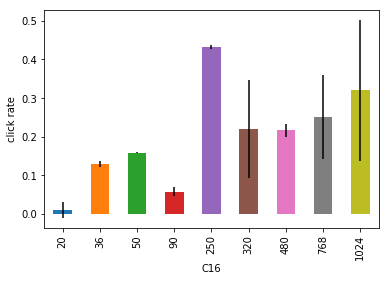

In [19]:
# C16=250, almost half click rate!
plot_cat_rate(train,'C16')

C18
0    348270
3    285946
2    150856
1     58430
Name: C18, dtype: int64


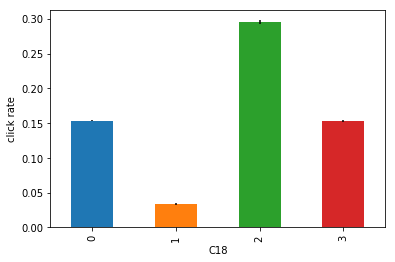

In [20]:
# C18=2 is the best ~0.3, very low for C18=1
plot_cat_rate(train,'C18')

banner_pos
0    603711
1    238077
7      1031
2       281
4       179
5       164
3        59
Name: banner_pos, dtype: int64


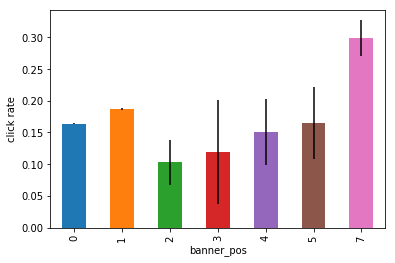

In [21]:
# banner_pos=7 seems promising, but too few shown
plot_cat_rate(train,'banner_pos')

site_category
50e219e0    339610
f028772b    272020
28905ebd    146424
3e814130     67565
f66779e6      6355
75fa27f6      3749
335d28a8      2998
76b2941d      2329
c0dd3be3       925
72722551       651
0569f928       342
70fb0e29       233
dedf689d       102
8fd0aea4        52
42a36e14        47
bcf865d9        45
a818d37a        34
5378d028        10
9ccfa2ea         9
74073276         1
e787de0e         1
Name: site_category, dtype: int64


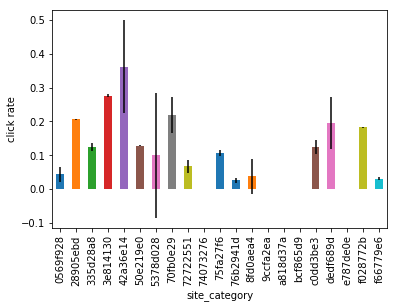

In [22]:
plot_cat_rate(train,'site_category')

app_category
07d7df22    556049
0f2161f8    195426
cef3e649     39530
8ded1f7a     26390
f95efa07     18336
d1327cf5      2853
09481d60      1323
dc97ec06       924
75d80bbe       838
fc6fa53d       547
4ce2e9fc       348
a3c42688       300
879c24eb       166
0f9a328c       136
4681bb9d       121
a86a3e89        84
2281a340        56
8df2e842        23
79f0b860        14
0bfbc358        11
a7fd01ec         6
7113d72a         5
2fc4f2aa         5
18b1e0be         4
0d82db25         3
bd41f328         2
5326cf99         1
71af18ce         1
Name: app_category, dtype: int64


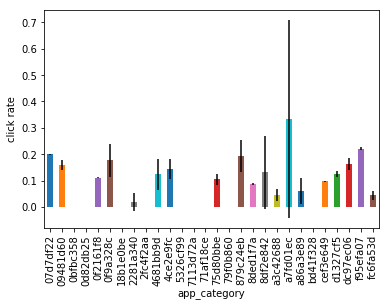

In [23]:
plot_cat_rate(train,'app_category')

#### Check feature "hour", may use it later

In [39]:
train['time'] = pd.to_datetime(train['hour'], format='%y%m%d%H')

In [40]:
train.hour.head()

0    14102100
1    14102100
2    14102100
3    14102100
4    14102100
Name: hour, dtype: int64

In [41]:
train.time.head()

0   2014-10-21
1   2014-10-21
2   2014-10-21
3   2014-10-21
4   2014-10-21
Name: time, dtype: datetime64[ns]

In [42]:
train.time.tail()

843497   2014-10-30
843498   2014-10-30
843499   2014-10-30
843500   2014-10-30
843501   2014-10-30
Name: time, dtype: datetime64[ns]

In [43]:
#get day of week, should be better than just date
train['dow'] = pd.to_datetime(train['hour'], format='%y%m%d%H').dt.dayofweek

dow
1    219261
2    212715
3     95042
6     88978
5     76767
4     75973
0     74766
Name: dow, dtype: int64


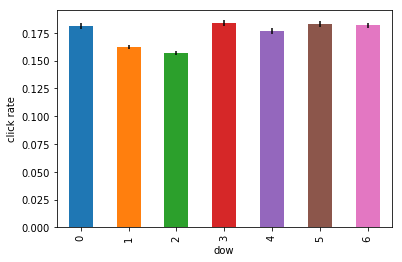

In [44]:
plot_cat_rate(train,'dow')

In [45]:
# get hour
train['24hour'] = pd.to_datetime(train['hour'], format='%y%m%d%H').dt.hour

In [46]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,time,dow,24hour
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,320,50,2161,0,35,100148,157,2014-10-21,1,0
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,320,50,2161,0,35,100034,157,2014-10-21,1,0
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,320,50,2480,3,297,100111,61,2014-10-21,1,0
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,320,50,423,2,39,100148,32,2014-10-21,1,0
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,2014-10-21,1,0


24hour
13    49392
9     47806
12    45611
8     45030
10    44295
14    43412
11    42620
17    42470
16    42425
15    42336
5     41238
7     39240
6     37471
4     37035
18    36612
3     30458
19    27702
2     26772
20    24132
1     21148
21    20316
0     19369
22    18976
23    17636
Name: 24hour, dtype: int64


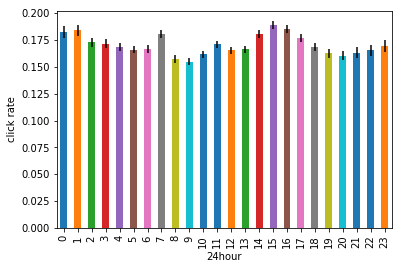

In [47]:
# max around 1AM, 7AM and 15PM 
plot_cat_rate(train,'24hour')

# Model building

#### build simple model first. get dummy for features with few unique values. There are features with very large number of unique values. not good to get dummy for them. May try label encoding for them later.

In [24]:
# build simple model first. get dummy for features below with few unique values
#C1                       7
#banner_pos               7
#device_type              4
#device_conn_type         4
#C15                      8
#C16                      9
#C18                      4

#dummy_col=['C1','C15','C16','C18','banner_pos','device_type','device_conn_type']

# drop_first=True, n-1 is enough for n unique values

df_dum_C1 = pd.get_dummies(train.C1,drop_first=True)
df_dum_C1.columns = map(lambda x: 'C1_' + str(x), df_dum_C1.columns)

df_dum_C15 = pd.get_dummies(train.C15,drop_first=True)
df_dum_C15.columns = map(lambda x: 'C15_' + str(x), df_dum_C15.columns)

df_dum_C16 = pd.get_dummies(train.C16,drop_first=True)
df_dum_C16.columns = map(lambda x: 'C16_' + str(x), df_dum_C16.columns)

df_dum_C18 = pd.get_dummies(train.C18,drop_first=True)
df_dum_C18.columns = map(lambda x: 'C18_' + str(x), df_dum_C18.columns)

df_dum_banner_pos = pd.get_dummies(train.banner_pos,drop_first=True)
df_dum_banner_pos.columns = map(lambda x: 'banner_pos_' + str(x), df_dum_banner_pos.columns)

df_dum_device_type = pd.get_dummies(train.device_type,drop_first=True)
df_dum_device_type.columns = map(lambda x: 'device_type_' + str(x), df_dum_device_type.columns)

df_dum_device_conn_type = pd.get_dummies(train.device_conn_type,drop_first=True)
df_dum_device_conn_type.columns = map(lambda x: 'device_conn_type_' + str(x), df_dum_device_conn_type.columns)

In [25]:
# concat all dummy
df_for_model = pd.concat([df_dum_C1,df_dum_C15,df_dum_C16,df_dum_C18,df_dum_banner_pos,df_dum_device_type,df_dum_device_conn_type], axis=1)

In [26]:
df_for_model.shape

(843502, 36)

In [27]:
# select random forest model fisrt since usually it can provide good performance out of box without tuning parameters
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
y=train.click.values

In [29]:
#split with stratify=y for imbalanced classses so that the click rates are same in training and test
X_train, X_test, y_train, y_test = train_test_split(df_for_model, y, test_size=0.30, random_state=67, stratify=y)

In [30]:
rf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
# we cannot use accuracy as metric for this kind of case(we should use F1 score or Area Under the ROC). 
# For example, if we try to predict spam emails from datasets with 100 spam emails and 900 non-spam emails. 
# A model which always predicts not spam would get 90% accuracy. 
rf.score(X_test, y_test)

0.8297339271530245

In [32]:
# confusion matrix, so bad!!!
pd.crosstab(y_test, rf.predict(X_test),rownames=['true'], colnames=['predict'])

predict,0,1
true,,
0,209954,10
1,43076,11


In [34]:
# very few of click were predcited, 0 f1-score :(
import sklearn.metrics as skm
print(skm.classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91    209964
          1       0.52      0.00      0.00     43087

avg / total       0.78      0.83      0.75    253051



In [36]:
# a little better than random guess, which should give us roc_auc_score of 0.5
import numpy as np
skm.roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1])

0.6447612860097113

In [37]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

/home/ji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ji/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


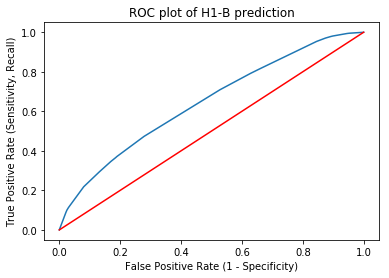

In [38]:
# plot roc curve, ideally we want the blue line to cover the up-left corner
import matplotlib.pyplot as plt
import numpy as np
v_probs = rf.predict_proba(X_test)[:, 1]
plot_roc(v_probs, y_test, "ROC plot of H1-B prediction", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

# Prediction on test data

Need a python script to automate the model building and prediction. We may want to build a model based on all data available and then pickle the model. Read in new data, make same transform as training data(IMPORTANT: if we have aggregate/impute in traing, we should use the exact value from training but not any calculation result from test. NO LEAKAGE!!!). unpickle the model and predict the test. Consider mismatch between training and test data. Missing feature in test, missing categorial feature value in test... more in test?

In [30]:
# try to get colums for test data
list(train.columns)

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [31]:
#remove 'click' from train.columns
test_col=['id',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [32]:
# load csv file
test=pd.read_csv('sampled_test', header=None)

In [33]:
test.columns=test_col

In [34]:
test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,635176803480460379,14103000,1002,0,85f751fd,c4e18dd6,50e219e0,27550a3c,7801e8d9,07d7df22,...,0,0,23553,300,50,2699,0,163,-1,212
1,6360170755674123511,14103000,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,17614,320,50,1993,2,1063,-1,33
2,6372531204453459606,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23726,320,50,2717,2,47,-1,23
3,6375797800199782003,14103000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
4,638604204480092601,14103000,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17239,320,50,1973,3,39,-1,23


In [35]:
test.nunique()

id                  100000
hour                    24
C1                       7
banner_pos               7
site_id               1003
site_domain            947
site_category           17
app_id                 669
app_domain              46
app_category            20
device_id             7819
device_ip            25385
device_model          2399
device_type              4
device_conn_type         4
C14                    834
C15                      6
C16                      7
C17                    198
C18                      4
C19                     46
C20                    141
C21                     38
dtype: int64

In [36]:
# check Nan. 
test.isnull().sum()

id                  0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [37]:
#prepare input for prediction, same as for training data
dum_C1 = pd.get_dummies(test.C1,drop_first=True)
dum_C1.columns = map(lambda x: 'C1_' + str(x), dum_C1.columns)

dum_C15 = pd.get_dummies(test.C15,drop_first=True)
dum_C15.columns = map(lambda x: 'C15_' + str(x), dum_C15.columns)

dum_C16 = pd.get_dummies(test.C16,drop_first=True)
dum_C16.columns = map(lambda x: 'C16_' + str(x), dum_C16.columns)

dum_C18 = pd.get_dummies(test.C18,drop_first=True)
dum_C18.columns = map(lambda x: 'C18_' + str(x), dum_C18.columns)

dum_banner_pos = pd.get_dummies(test.banner_pos,drop_first=True)
dum_banner_pos.columns = map(lambda x: 'banner_pos_' + str(x), dum_banner_pos.columns)

dum_device_type = pd.get_dummies(test.device_type,drop_first=True)
dum_device_type.columns = map(lambda x: 'device_type_' + str(x), dum_device_type.columns)

dum_device_conn_type = pd.get_dummies(test.device_conn_type,drop_first=True)
dum_device_conn_type.columns = map(lambda x: 'device_conn_type_' + str(x), dum_device_conn_type.columns)

In [38]:
# merge all dummy features
for_test = pd.concat([dum_C1,dum_C15,dum_C16,dum_C18,dum_banner_pos,dum_device_type,dum_device_conn_type], axis=1)

In [39]:
# Add a missing column in test set with default value equal to 0
# what if test has more values in some category feature? unlikely to happen
missing_cols = set(df_for_model.columns)-set(for_test.columns)
for c in missing_cols:
    for_test[c] = 0

In [40]:
# list missing colums compared with training data
missing_cols

{'C15_216', 'C15_768', 'C16_1024', 'C16_36'}

In [41]:
for_test.head()

,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,C1_1012,C15_300,C15_320,C15_480,C15_728,...,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,C15_768,C16_1024,C15_216,C16_36
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
# make sure the columns in test is in the same order with training
for_test= for_test[df_for_model.columns]

In [43]:
for_test.head()

,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,C1_1012,C15_216,C15_300,C15_320,C15_480,...,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
# compute probabilities
output = rf.predict_proba(for_test)

In [63]:
output[:, 1]

array([0.17208319, 0.30068768, 0.22990126, ..., 0.13028946, 0.13028946,
       0.18976613])

In [64]:
#save predictions to csv
pd.DataFrame(output[:, 1]).to_csv('predictions.csv')

# try label encoding for other features

In [44]:
from sklearn import preprocessing

In [45]:
# features for label encoding
label_f=['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id','device_ip', 'device_model']

In [46]:
# fit_transform for training data and use transfrom to get label encoding for test data later
# shouldn't do fit again for test, since we need to use the same label system from training data to test data!!!
train_01=train.copy()
label = preprocessing.LabelEncoder()

for f in label_f:
    train_01[f] = label.fit_transform(train_01[f])

In [47]:
train_01.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,1468,112,19,2045,68,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,1252,1936,5,100,41,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,1252,1936,5,2201,76,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,1252,1936,5,1950,53,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,289,2384,1,2045,68,...,1,2,15706,320,50,1722,0,35,100084,79


In [48]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,100084,79


In [49]:
train_01[label_f].shape,df_for_model.shape

((843502, 9), (843502, 36))

In [50]:
# concat dummy and label encoding features
df_for_model02 = pd.concat([df_for_model,train_01[label_f]], axis=1)

In [51]:
df_for_model02.head()

,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,C1_1012,C15_216,C15_300,C15_320,C15_480,...,device_conn_type_5,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,0,1,0,0,0,0,0,0,1,0,...,0,1468,112,19,2045,68,0,52076,53164,2234
1,0,1,0,0,0,0,0,0,1,0,...,0,1252,1936,5,100,41,26,52076,124063,744
2,0,1,0,0,0,0,0,0,1,0,...,0,1252,1936,5,2201,76,4,52076,17297,2624
3,0,1,0,0,0,0,0,0,1,0,...,0,1252,1936,5,1950,53,4,58289,48733,550
4,0,1,0,0,0,0,0,0,1,0,...,0,289,2384,1,2045,68,0,52076,16893,4392


In [52]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_for_model02, y, test_size=0.30, random_state=67, stratify=y)

In [ ]:
# laptop dead :(, wrap up work here
rf2=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf2.fit(X_train2, y_train2)

# Comments and future work

I would like to see whether adding label encoding features will help improve the performance. 

I have worked on similar imbalanced classes project before. Initially the model cannot predict even single minority. Feature engineering may help, but it would be better to know what are those anonymized categorical variables. Get more domain knowledge!!!

May try downsampling majority class, oversampleing minority class or SMOTE, ADASYN

Check feature importances to help business make decision since we don't just want to know click or not click, business want to know what can help to improve click rate! From EDA, we see for some of the features, some values show very good click rate. Figure it out why and modify the prodcut.

Use cross validation to compare different models, GridSearchCV to find best paramters. Gradient Boosting usually provides better performance than radom forest after parameter tuning.